<a href="https://colab.research.google.com/github/JUHYUN030/DALC_AI/blob/main/(%EC%8B%A4%EC%8A%B5)DALC_AIstudy_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수치미분


In [10]:
def numerical_diff(f,x):
  h = 1e-4 #0.0001 
  return (f(x+h) - f(x-h)) / (2*h) 

In [11]:
def function_1(x):
  return 0.02*x**2 + 0.1*x

In [12]:
def tangent_line(f,x):
  d = numerical_diff(f,x)
  print(d)
  y = f(x) - d*x
  return lambda t: d*t + y 

0.2999999999986347


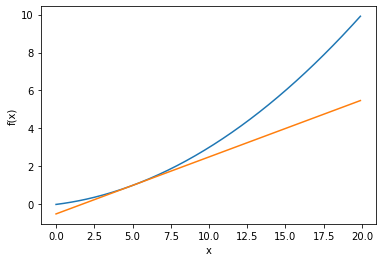

In [13]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x,y)
plt.plot(x,y2)
plt.show()

## 경사하강법(Gradient descent)





### 볼록함수(Convex Function)
- 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음

- 1-D Convex Function
![](https://www.researchgate.net/profile/Miodrag_Mateljevic/publication/313821095/figure/fig5/AS:476113622310916@1490525741603/A-strictly-convex-function.png)
<br /><sub>출처: https://www.researchgate.net/figure/A-strictly-convex-function_fig5_313821095</sub>

- 2-D Convex Function  
![](https://www.researchgate.net/publication/275069197/figure/fig8/AS:324418665500689@1454358845613/Sphere-function-D-2.png)
<br /><sub>출처: https://www.researchgate.net/figure/Sphere-function-D-2_fig8_275069197</sub>

### 비볼록함수(Non-Convex Function)

- 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음.

- 1-D Non-Convex Function
![](https://image1.slideserve.com/2659452/example-of-non-convex-function-l.jpg)

<sub>출처: https://www.slideserve.com/betha/local-and-global-optima</sub>

- 2-D Non-Convex Function

![](https://upload.wikimedia.org/wikipedia/commons/e/e3/Non-Convex_Objective_Function.gif)

<sub>출처: https://commons.wikimedia.org/wiki/File:Non-Convex_Objective_Function.gif</sub>

### 경사하강법


#### 미분과 기울기
- 스칼라를 벡터로 미분한 것

## $\quad \frac{df(x)}{dx} = \lim_{\triangle x \to 0} \frac{f(x+\triangle x) - f(x)}{\triangle x}$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Gradient2.svg/2560px-Gradient2.svg.png)

<sub>출처: https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%9A%B8%EA%B8%B0_(%EB%B2%A1%ED%84%B0)</sub>

  ## $\quad \triangledown f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ ... \ , \frac{\partial f}{\partial x_N} \right)$
  - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
  - 미분값이 클수록 변화량이 크다는 의미


#### 경사하강법의 과정

- 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정

- $f(x)$의 값이 변하지 않을 때까지 반복

  ## $\qquad x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
    
    - $\eta$ : 학습률(learning rate)

- 즉, **미분값이 0인 지점**을 찾는 방법  

![](https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND.)
<br /><sub>출처: https://www.kdnuggets.com/2018/06/intuitive-introduction-gradient-descent.html</sub>


- 2-D 경사하강법

![](https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif)
<br /><sub>출처: https://gfycat.com/ko/angryinconsequentialdiplodocus</sub>

#### 경사하강법 구현

$\quad f_1(x) = x^2$

In [14]:
# 손실함수 정의
def f1(x):
  return x**2

# 손실함수를 미분한 값을 반환하는 함수 정의
def df_dx1(x):
  return 2*x

#### gradient_descent 함수정의
##### 매개변수로 만들어야할 5개 
* f : 손실함수
* df_dx : 손실함수를 미분한 값을 반환하는 함수
* init_x : 초기값
* learning_rate : 학습률, 하이퍼파라미터
* step_num : 반복 횟수


In [15]:
def gradient_descent(f, df_dx, init_x, learning_rate=0.01, step_num=100):
  x = init_x
  x_log, y_log = [x], [f(x)]

  for i in range(step_num):
    grad = df_dx(x)
    x -= learning_rate * grad

    x_log.append(x)
    y_log.append(f(x))        # x,y 값의 변화를 로그로 저장

  return x_log, y_log

#### 경사하강법 시각화

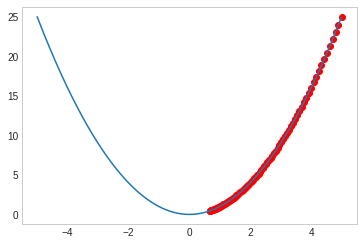

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

x_init = 5
x_log, y_log = gradient_descent(f1, df_dx1, init_x=x_init) # 위에서 정의한 f1과 df_dx1 을 매개변수로 사용하면 됩니다.
plt.scatter(x_log, y_log, color='red')

x = np.arange(-5, 5, 0.01)
plt.plot(x, f1(x))
plt.grid()
plt.show()

### 학습률(learning rate)
- 학습률 값은 적절히 지정해야 한다!
- 너무 크면 발산하고, 너무 작으면 학습이 잘 되지 않는다.
  
![](https://cdn-images-1.medium.com/freeze/max/1000/1*22oh44C5tUHbZ0yvIKWDFg.png)
<sub>출처: https://mc.ai/an-introduction-to-gradient-descent-algorithm/</sub>
